# coPTR comparison
> From read generation to correlation

In [1]:
%load_ext autoreload
%autoreload 2

import aptr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
MAX_MULT = 1
MIN_MULT = -2

# Synthetic data generation
Currently using multipliers from 1E-1 to 1E-4. The 1E-1 files are 5Gb each,
which approaches the limit of what I can shuffle in memory.

This should be run with the `aPTR` conda environment

In [3]:
# %%prun 
# Generate synthetic data
dd = "../../experiments/synthetic/february2023"
db = aptr.RnaDB()

! mkdir -p {dd}

for multiplier in range(MAX_MULT, MIN_MULT, -1):
    print(f"Generating fastq_1E{multiplier}")

    # Catch crashes earlier if you iterate down
    try:
        os.mkdir(f"{dd}/fastq_1E{multiplier}")
    except FileExistsError:
        pass

    # Generate data
    abundances, log2_ptrs, otus = aptr.simulation_new.make_tables(
        n_genomes=20,
        n_samples=10,
        db=db,
        sparsity=0.5,
        multiplier=10**multiplier,
        fasta_dir="../../data/seqs",
        fasta_ext=".fna",
        fastq_out_path=f"{dd}/fastq_1E{multiplier}",
        downsample=.01,
        shuffle=False
    )

    # Save abundances, ptrs, otus
    abundances.to_csv(f"{dd}/abundances_1E{multiplier}.tsv", sep="\t")
    log2_ptrs.to_csv(f"{dd}/log2_ptrs_1E{multiplier}.tsv", sep="\t")
    otus.to_csv(f"{dd}/otus_1E{multiplier}.tsv", sep="\t")


0.9992494370778083 sequences remain after trimming
0.6346009507130348 sequences remain after filtering
Generating fastq_1E1
5723298
<class 'int'>
(5723298,)
(81515239,)
(814994,)
5061632
<class 'int'>
(5061632,)
(135673291,)
(1357224,)
3060291
<class 'int'>
(3060291,)
(0,)
(0,)
7029352
<class 'int'>
(7029352,)
(21060285,)
(210327,)
5458505
<class 'int'>
(5458505,)
(0,)
(0,)
4106053
<class 'int'>
(4106053,)
(27133326,)
(271051,)
2132142
<class 'int'>
(2132142,)
(68479196,)
(685564,)
9127347
<class 'int'>
(9127347,)
(0,)
(0,)
6487685
<class 'int'>
(6487685,)
(0,)
(0,)
1389513
<class 'int'>
(1389513,)
(7283827,)
(72978,)
2835737
<class 'int'>
(2835737,)
(22488855,)
(224149,)
1084901
<class 'int'>
(1084901,)
(0,)
(0,)
1390397
<class 'int'>
(1390397,)
(25364188,)
(253997,)
4352101
<class 'int'>
(4352101,)
(0,)
(0,)
2560265
<class 'int'>
(2560265,)
(5199321,)
(52131,)
4962103
<class 'int'>
(4962103,)
(0,)
(0,)
1654761
<class 'int'>
(1654761,)
(122910943,)
(1229546,)
5163189
<class 'int'>
(51

# Run aPTR

These cells should be executed using the `aPTR` conda environment

In [4]:
for multiplier in range(MAX_MULT, MIN_MULT, -1):
    ! ~/aptr/_aptr.py {dd}/fastq_1E{multiplier} "" "" --otu_path {dd}/otus_1E{multiplier}.tsv

0.9992494370778083 sequences remain after trimming
0.6346009507130348 sequences remain after filtering
Output directory UUID: ../../experiments/synthetic/february2023/fastq_1E1/aptr_abfea757-3503-493e-a8d0-83b0ce70df21
Genomes: ['759620.7', '1379870.5', '1262449.8', '637905.5', '479436.6', '498761.4', '435590.9', '592031.3', '447217.5', '485918.6', '936155.3', '383372.6', '818.23', '759620.6', '267747.3', '1042156.4', '37659.3', '1392490.5', '640131.3', '743721.3']
Initial:	 -1583.34521484375
Epoch 0:	 -14906.6962890625
Epoch 1:	 -16917.646484375
Epoch 2:	 -18246.55859375
Epoch 3:	 -19304.431640625
Epoch 4:	 -20214.73828125
Epoch 5:	 -21025.6328125
Epoch 6:	 -21756.8984375
Epoch 7:	 -22416.703125
Epoch 8:	 -23009.400390625
Epoch 9:	 -23539.228515625
Epoch 10:	 -24011.4609375
Epoch 11:	 -24432.205078125
Epoch 12:	 -24807.791015625
Epoch 13:	 -25144.216796875
Epoch 14:	 -25446.833984375
Epoch 15:	 -25720.26953125
Epoch 16:	 -25968.443359375
Epoch 17:	 -26194.638671875
Epoch 18:	 -26401.6

mv: cannot move '../../experiments/synthetic/february2023/fastq_1E1/aptr_results' to a subdirectory of itself, '../../experiments/synthetic/february2023/fastq_1E1/aptr_results/aptr_results'
mv: cannot move '../../experiments/synthetic/february2023/fastq_1E0/aptr_results' to a subdirectory of itself, '../../experiments/synthetic/february2023/fastq_1E0/aptr_results/aptr_results'
mv: cannot move '../../experiments/synthetic/february2023/fastq_1E-1/aptr_results' to a subdirectory of itself, '../../experiments/synthetic/february2023/fastq_1E-1/aptr_results/aptr_results'


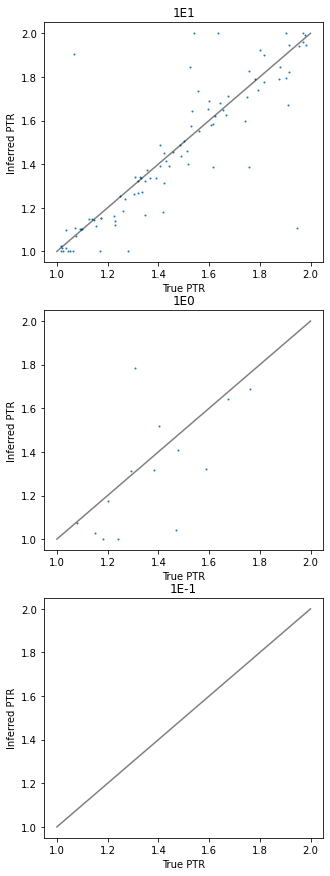

In [10]:
# Are these any good?
fig, axs = plt.subplots(3, 1, figsize=(5, 15))
for i, multiplier in enumerate(range(MAX_MULT, MIN_MULT, -1)):
    # Idempotent directory move
    ! mv {dd}/fastq_1E{multiplier}/aptr_* {dd}/fastq_1E{multiplier}/aptr_results
    
    aptr_results = pd.read_csv(f"{dd}/fastq_1E{multiplier}/aptr_results/inferred_ptrs.tsv", sep="\t", dtype={0: str})
    aptr_results = aptr_results.set_index(aptr_results.columns[0])

    true_ptrs = pd.read_csv(f"{dd}/log2_ptrs_1E{multiplier}.tsv", sep="\t", dtype={0: str})
    true_ptrs = true_ptrs.set_index(true_ptrs.columns[0])
    true_ptrs = 2**true_ptrs

    # Compare
    aptr_results = aptr_results.loc[true_ptrs.index]
    true_ptrs = true_ptrs.loc[aptr_results.index]

    # Plot
    axs[i].scatter(true_ptrs, aptr_results, s=1)
    axs[i].set_title(f"1E{multiplier}")
    axs[i].set_xlabel("True PTR")
    axs[i].set_ylabel("Inferred PTR")
    axs[i].plot([1, 2], [1, 2], c="k", alpha=.5)


# Run coPTR
These cells must be executed with the `coptr` conda environment

In [1]:
# ! conda install -n coptr ipykernel --update-deps --force-reinstall
import pandas as pd
dd = "../../experiments/synthetic/february2023"
MAX_MULT = 1
MIN_MULT = -2

In [6]:
# Step 1: Get all of the FASTA files we used and make an index

genomes = set()
for multiplier in range(MAX_MULT, MIN_MULT, -1):
    genomes |= set(
        pd.read_table(f"{dd}/log2_ptrs_1E{multiplier}.tsv", dtype={0: str}).iloc[:,0]
    )

print(genomes)

! mkdir -p {dd}/coptr
! mkdir -p {dd}/coptr/seqs
! mkdir -p {dd}/coptr/index
for genome in genomes:
    ! cp ../../data/seqs/{genome}.fna {dd}/coptr/seqs

! coptr index {dd}/coptr/seqs {dd}/coptr/index/seqs

{'2045.3', '37659.3', '632518.3', '246194.6', '1262449.8', '1379870.5', '1123518.3', '634503.3', '529120.14', '592031.3', '743721.3', '436113.7', '862965.3', '867900.3', '267747.3', '383372.6', '479436.6', '435590.9', '457431.3', '818.23', '748449.3', '458817.8', '692420.6', '640131.3', '1028989.3', '2113.3', '504728.9', '630626.3', '398579.7', '945021.8', '1536773.3', '435591.13', '405948.11', '880478.3', '759620.7', '64471.13', '457425.27', '485918.6', '637905.5', '457428.4', '1125863.3', '936155.3', '262768.5', '1695218.3', '656519.3', '60480.19', '1246626.3', '447217.5', '1042156.4', '498761.4', '983952.3', '309799.4', '1094497.3', '135487.3', '198628.6', '759620.6', '157783.3', '1392490.5', '390333.7'}
[INFO] [Feb 09, 2023 16:54:32] [coptr.read_mapper] Found 59 files totaling 0.226 GB.
[INFO] [Feb 09, 2023 16:54:32] [coptr.read_mapper] Copying FASTA files to coptr-fna-2023-02-09T21:54:32+00:00.fna with prepended genome ids (filenames).
[INFO] [Feb 09, 2023 16:54:33] [coptr.read_ma

In [12]:
# Step 2: run coPTR on each directory of FASTQ files

for multiplier in range(MAX_MULT, MIN_MULT, -1):
    ! mkdir -p {dd}/coptr/bam_1E{multiplier}
    ! coptr map {dd}/coptr/index/seqs {dd}/fastq_1E{multiplier} {dd}/coptr/bam_1E{multiplier} --threads 12

[INFO] [Feb 09, 2023 18:31:30] [coptr.read_mapper] Mapping ../../experiments/synthetic/february2023/fastq_1E1 to ../../experiments/synthetic/february2023/coptr/bam_1E1/Sample_0.sam
[INFO] [Feb 09, 2023 18:31:30] [coptr.read_mapper] bowtie2 -x ../../experiments/synthetic/february2023/coptr/index/seqs ../../experiments/synthetic/february2023/fastq_1E1/Sample_0.fastq --no-unal -p 12 -k 10
5898925 reads; of these:
  5898925 (100.00%) were unpaired; of these:
    434 (0.01%) aligned 0 times
    5492614 (93.11%) aligned exactly 1 time
    405877 (6.88%) aligned >1 times
99.99% overall alignment rate
[INFO] [Feb 09, 2023 18:36:00] [coptr.read_mapper] Converting ../../experiments/synthetic/february2023/coptr/bam_1E1/Sample_0.sam to ../../experiments/synthetic/february2023/coptr/bam_1E1/Sample_0.bam.
[INFO] [Feb 09, 2023 18:36:43] [coptr.read_mapper] Cleaning up ../../experiments/synthetic/february2023/coptr/bam_1E1/Sample_0.sam.
[INFO] [Feb 09, 2023 18:36:44] [coptr.read_mapper] Mapping ../../

In [2]:
# Step 3: extract coverage maps

for multiplier in range(MAX_MULT, MIN_MULT, -1):
    ! mkdir -p {dd}/coptr/coverage_maps_1E{multiplier}
    ! coptr extract {dd}/coptr/bam_1E{multiplier} {dd}/coptr/coverage_maps_1E{multiplier}

[INFO] [Feb 10, 2023 10:09:07] [coptr.bam_processor] Processing ../../experiments/synthetic/february2023/coptr/bam_1E1/Sample_0.bam.
[INFO] [Feb 10, 2023 10:10:09] [coptr.bam_processor] Determining reference genomes.
[INFO] [Feb 10, 2023 10:11:01] [coptr.bam_processor] Collecting multi-mapped reads.
[INFO] [Feb 10, 2023 10:12:41] [coptr.bam_processor] Assigning multi-mapped reads.
[INFO] [Feb 10, 2023 10:13:50] [coptr.bam_processor] Grouping reads by reference genome.
[INFO] [Feb 10, 2023 10:13:51] [coptr.bam_processor] Processing ../../experiments/synthetic/february2023/coptr/bam_1E1/Sample_1.bam.
[INFO] [Feb 10, 2023 10:14:34] [coptr.bam_processor] Determining reference genomes.
[INFO] [Feb 10, 2023 10:15:15] [coptr.bam_processor] Collecting multi-mapped reads.
[INFO] [Feb 10, 2023 10:16:38] [coptr.bam_processor] Assigning multi-mapped reads.
[INFO] [Feb 10, 2023 10:17:16] [coptr.bam_processor] Grouping reads by reference genome.
[INFO] [Feb 10, 2023 10:17:16] [coptr.bam_processor] P

In [3]:
# Step 4: get PTRs

for multiplier in range(MAX_MULT, MIN_MULT, -1):
    ! coptr estimate {dd}/coptr/coverage_maps_1E{multiplier} {dd}/coptr/coptr_1E{multiplier}.csv

[INFO] [Feb 10, 2023 12:09:06] [coptr.cli] Grouping reads by reference genome.
[INFO] [Feb 10, 2023 12:09:06] [coptr.cli] Saving to ../../experiments/synthetic/february2023/coptr/coverage_maps_1E1/coverage-maps-genome:
[INFO] [Feb 10, 2023 12:09:06] [coptr.cli] 	Sample_0.cm.pkl
[INFO] [Feb 10, 2023 12:09:06] [coptr.cli] 	Sample_1.cm.pkl
[INFO] [Feb 10, 2023 12:09:07] [coptr.cli] 	Sample_2.cm.pkl
[INFO] [Feb 10, 2023 12:09:07] [coptr.cli] 	Sample_3.cm.pkl
[INFO] [Feb 10, 2023 12:09:07] [coptr.cli] 	Sample_4.cm.pkl
[INFO] [Feb 10, 2023 12:09:08] [coptr.cli] 	Sample_5.cm.pkl
[INFO] [Feb 10, 2023 12:09:09] [coptr.cli] 	Sample_6.cm.pkl
[INFO] [Feb 10, 2023 12:09:09] [coptr.cli] 	Sample_7.cm.pkl
[INFO] [Feb 10, 2023 12:09:09] [coptr.cli] 	Sample_8.cm.pkl
[INFO] [Feb 10, 2023 12:09:13] [coptr.cli] 	Sample_9.cm.pkl
[INFO] [Feb 10, 2023 12:09:13] [coptr.cli] Grouping by reference genome: Complete.
[INFO] [Feb 10, 2023 12:09:13] [coptr.cli] The --restart flag can be used to start from here.
[INF

In [ ]:
# Step 5: get read counts as well

for multiplier in range(MAX_MULT, MIN_MULT, -1):
    ! coptr count {dd}/coptr/coverage_maps_1E{multiplier} {dd}/coptr/coptr_counts_1E{multiplier}.csv

# Compare performance of aPTR and coPTR

Run using the `aPTR` conda environment

(13, 10) (13, 10) (13, 10)
(20, 10) (20, 10) (20, 10)
(20, 10) (20, 10) (20, 10)


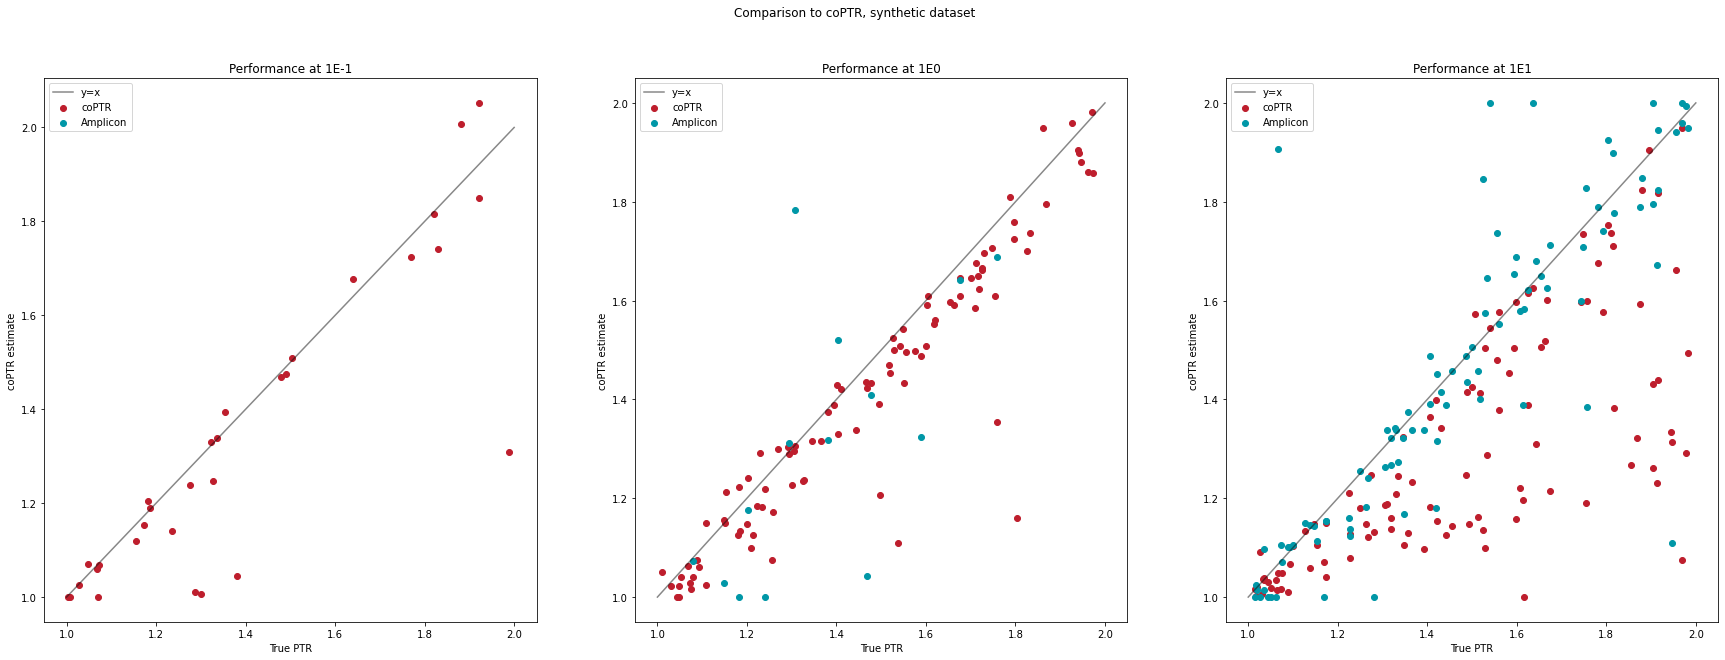

In [7]:
# Load PTR data, coPTR estimates, and aPTR estimates and compare

dd = "../../experiments/synthetic/february2023"
MAX_MULT = 2
MIN_MULT = -1
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
for multiplier, ax in zip(range(MIN_MULT, MAX_MULT, 1), axs):
    true_ptrs = pd.read_table(f"{dd}/log2_ptrs_1E{multiplier}.tsv", dtype={0: str})
    true_ptrs = true_ptrs.set_index(true_ptrs.columns[0])
    true_ptrs = 2**true_ptrs

    coptr_estimate = pd.read_csv(f"{dd}/coptr/coptr_1E{multiplier}.csv", dtype={0: str})
    coptr_estimate = coptr_estimate.set_index(coptr_estimate.columns[0])
    coptr_estimate = 2**coptr_estimate

    aptr_estimate = pd.read_table(f"{dd}/fastq_1E{multiplier}/aptr_results/inferred_ptrs.tsv", dtype={0: str})
    aptr_estimate = aptr_estimate.set_index(aptr_estimate.columns[0])

    # Reindex to shared OTUs
    true_ptrs = true_ptrs.reindex(set(coptr_estimate.index) & set(aptr_estimate.index))
    coptr_estimate = coptr_estimate.loc[true_ptrs.index]
    aptr_estimate = aptr_estimate.loc[true_ptrs.index]

    print(true_ptrs.shape, coptr_estimate.shape, aptr_estimate.shape)

    # Non-NA for all

    ax.scatter(true_ptrs.values, coptr_estimate.values, c="#BE1E2D")
    ax.scatter(true_ptrs.values, aptr_estimate.values, c="#0097A7")
    ax.plot([1, 2], [1, 2], c="#111111", alpha=.5)
    ax.set_xlabel("True PTR")
    ax.set_ylabel("coPTR estimate")
    ax.set_title(f"Performance at 1E{multiplier}")
    ax.legend(["y=x", "coPTR", "Amplicon"])

plt.suptitle("Comparison to coPTR, synthetic dataset")
plt.show()

In [ ]:
# Accuracy vs. number of reads

n_reads_coptr = []
for multiplier in range(MIN_MULT, MAX_MULT, 1):
    coptr_estimate = pd.read_csv(f"{dd}/coptr/coptr_1E{multiplier}.csv", dtype={0: str})
